#  step1: import all necessary libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Step 2: Import the dataset provided

In [12]:
file_path = 'C:/Users/kamsa/OneDrive/Desktop/portfolio/loan-prediction UC.csv.xlsx'

df = pd.read_excel(file_path)

# Step 3: Understand the data

In [13]:
print("First few rows of the dataset:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())
print("\nInformation about the dataset:")
print(df.info())

First few rows of the dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural    

# Step 4: Deal with the missing values if any
# Convert entire DataFrame to strings to avoid mixed types

In [14]:
df = df.astype(str)


# Define numerical and categorical columns
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Education', 'Property_Area', 'Loan_Status']

# Convert numerical columns back to numeric and impute missing values
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
imputer_mean = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_mean.fit_transform(df[numerical_cols])

# Impute missing values for categorical columns
imputer_mode = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_mode.fit_transform(df[categorical_cols])

# Verify if missing values are handled
print("\nInformation about the dataset after handling missing values:")
print(df.info())


Information about the dataset after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    object 
 7   CoapplicantIncome  614 non-null    object 
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), object(10)
memory usage: 62.5+ KB
None


# Step 5: Do some visualization if necessary
# Visualization of the target variable

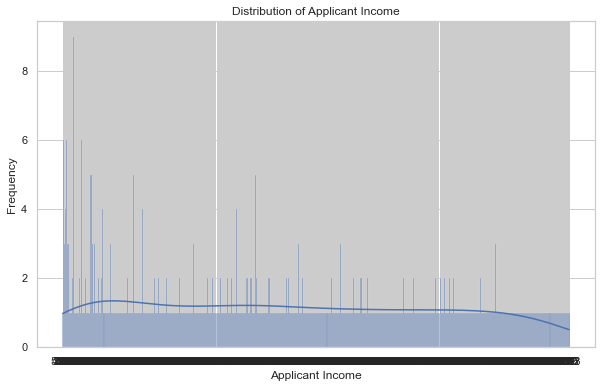

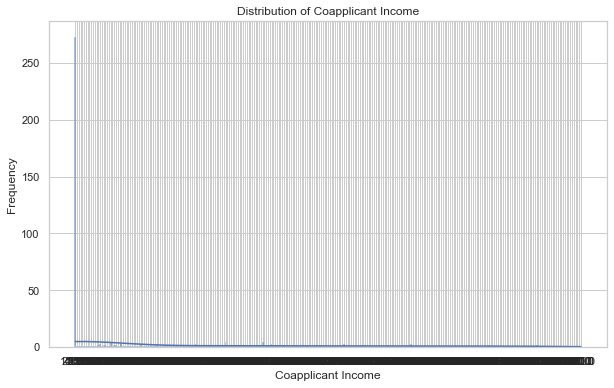

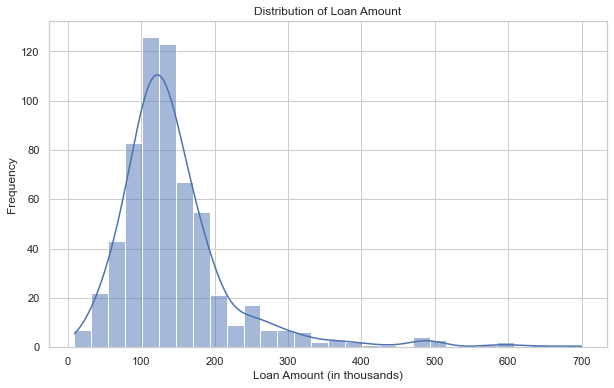

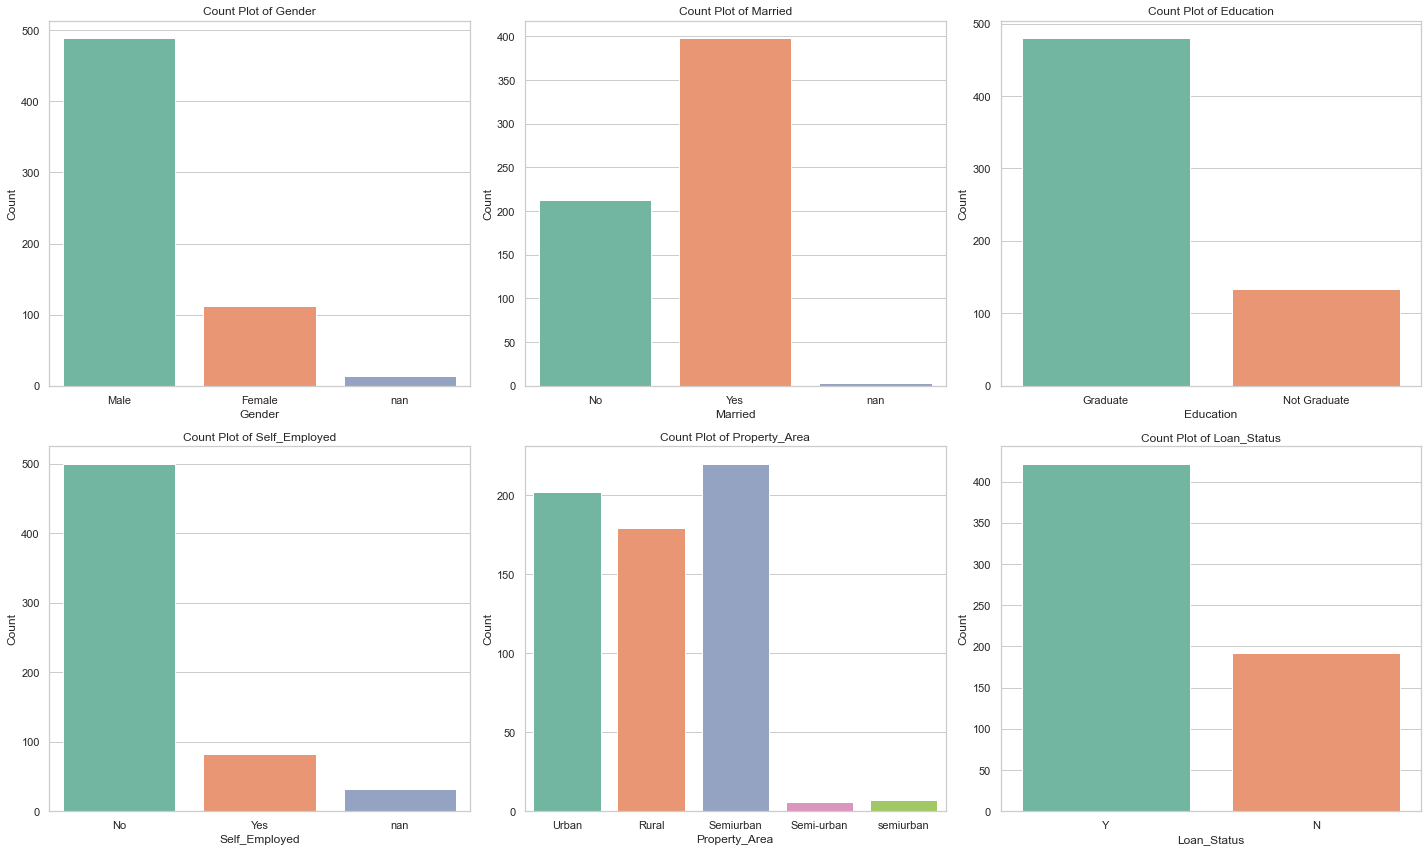

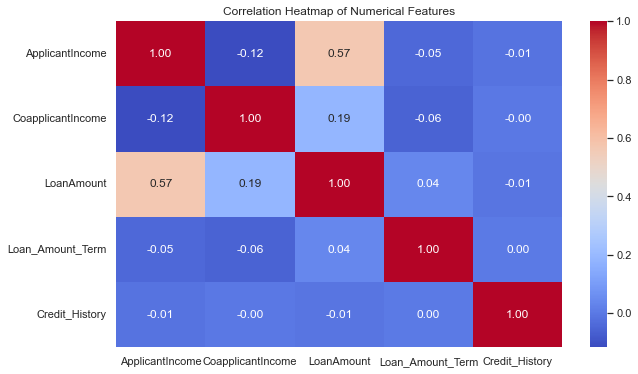

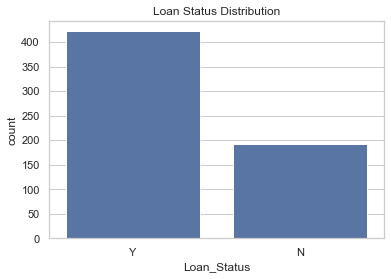

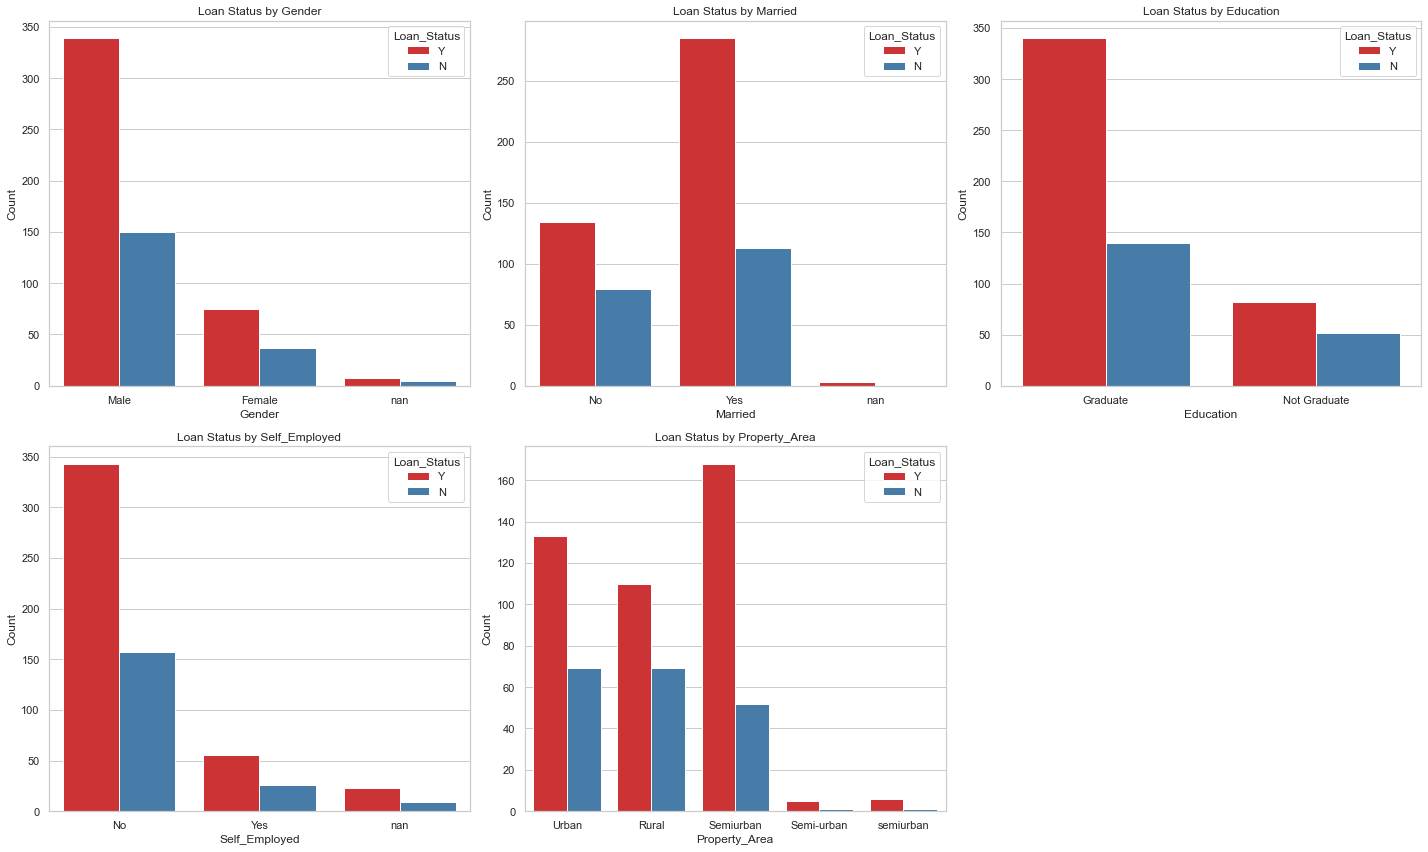

In [15]:
# Set the style of the plots
sns.set(style="whitegrid")

# Example DataFrame (Replace this with your actual DataFrame)
# df = pd.read_csv('your_file.csv')  # Make sure your DataFrame is correctly loaded

# Plot the distribution of ApplicantIncome
plt.figure(figsize=(10, 6))
sns.histplot(df['ApplicantIncome'], kde=True, bins=30)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of CoapplicantIncome
plt.figure(figsize=(10, 6))
sns.histplot(df['CoapplicantIncome'], kde=True, bins=30)
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of LoanAmount
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount'], kde=True, bins=30)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount (in thousands)')
plt.ylabel('Frequency')
plt.show()

# Count plot for categorical features
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

plt.figure(figsize=(20, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=feature, hue=feature, palette='Set2', legend=False)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.show()

# Count plot for Loan_Status based on different categorical features
plt.figure(figsize=(20, 12))
for i, feature in enumerate(categorical_features[:-1], 1):  # Exclude Loan_Status itself
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=feature, hue='Loan_Status', palette='Set1')
    plt.title(f'Loan Status by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Step 6: Divide the dataset into training and test datasets
# Encode categorical variables

In [16]:
label_encoders = {}
for column in categorical_cols:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features and target variable
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Build the machine learning model which ever is suitable for the dataset
# Initialize the model

In [17]:
model = RandomForestClassifier(n_estimators=40,random_state=42)


# Step 8: Fit the model on the training dataset

In [18]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40, random_state=42)

# Step 9: Test the model and find the accuracy of the model on the test and the training datasets
# Predict on the training data

In [19]:
train_preds = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)

# Predict on the test data
test_preds = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')



Training Accuracy: 1.0
Test Accuracy: 0.7513513513513513


# Step 10: Create a confusion matrix

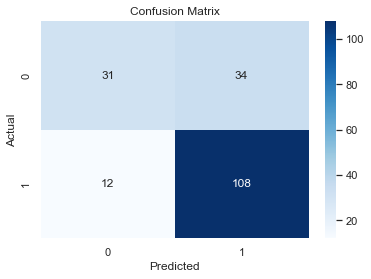

In [20]:
# Step 10: Create a confusion matrix
conf_matrix = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()